In [103]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [ ]:
Ubuntu_px4_12 and 13 showed the better results
px4_11: Repeat px4_2 with px4_1 setup
px4_12: Continue px4_2 from best point with lr=0.00005, >> Minimum: 0.218 at 5250
px4_13: Continue px4_2 with lr=0.00005, >> Minimum: 0.180 at 4850
px4_14: Repeat px4_2 with 5Hz, >> Minimum: 0.260 at 700
px4_15: Repeat px4_2 with 20Hz, >> Minimum: 0.260 at 5450
px4_16: 6 layer, >> Minimum: 0.241 at 4400
px4_17: 7 layer
    
px4_21: Continue px4_12 from best point 2@5000 with lr=0.00001
px4_22: Continue px4_12 from best point 1@5250 with lr=0.00001
px4_23: Continue px4_13 from best point 1@4850 with lr=0.00001
px4_24: Continue px4_12 from best point 3@4900 with lr=0.00001
px4_25: Continue px4_13 from best point 2@4800 with lr=0.00001
px4_26: Continue px4_13 from best point 3@4700 with lr=0.00001
px4_27: Continue px4_13 from best point 4@4000 with lr=0.00001


In [ ]:
px4_25: 
learning_rate = 0.00001 # @param {type:"number"}
collect_episodes_per_iteration = 4 # @param {type:"integer"}
replay_buffer_capacity = 5000 # @param {type:"integer"}
fc_layer_params = (100,200,100,50,25)
#04/10/2023
Initial: 0.2629
Final  : 0.1719, 0.0136 at 6050
Minimum: 0.1719, 0.0136 at 6050


Initial: 0.2629
Final  : 0.1719, 0.0136 at 6050
Minimum: 0.1719, 0.0136 at 6050


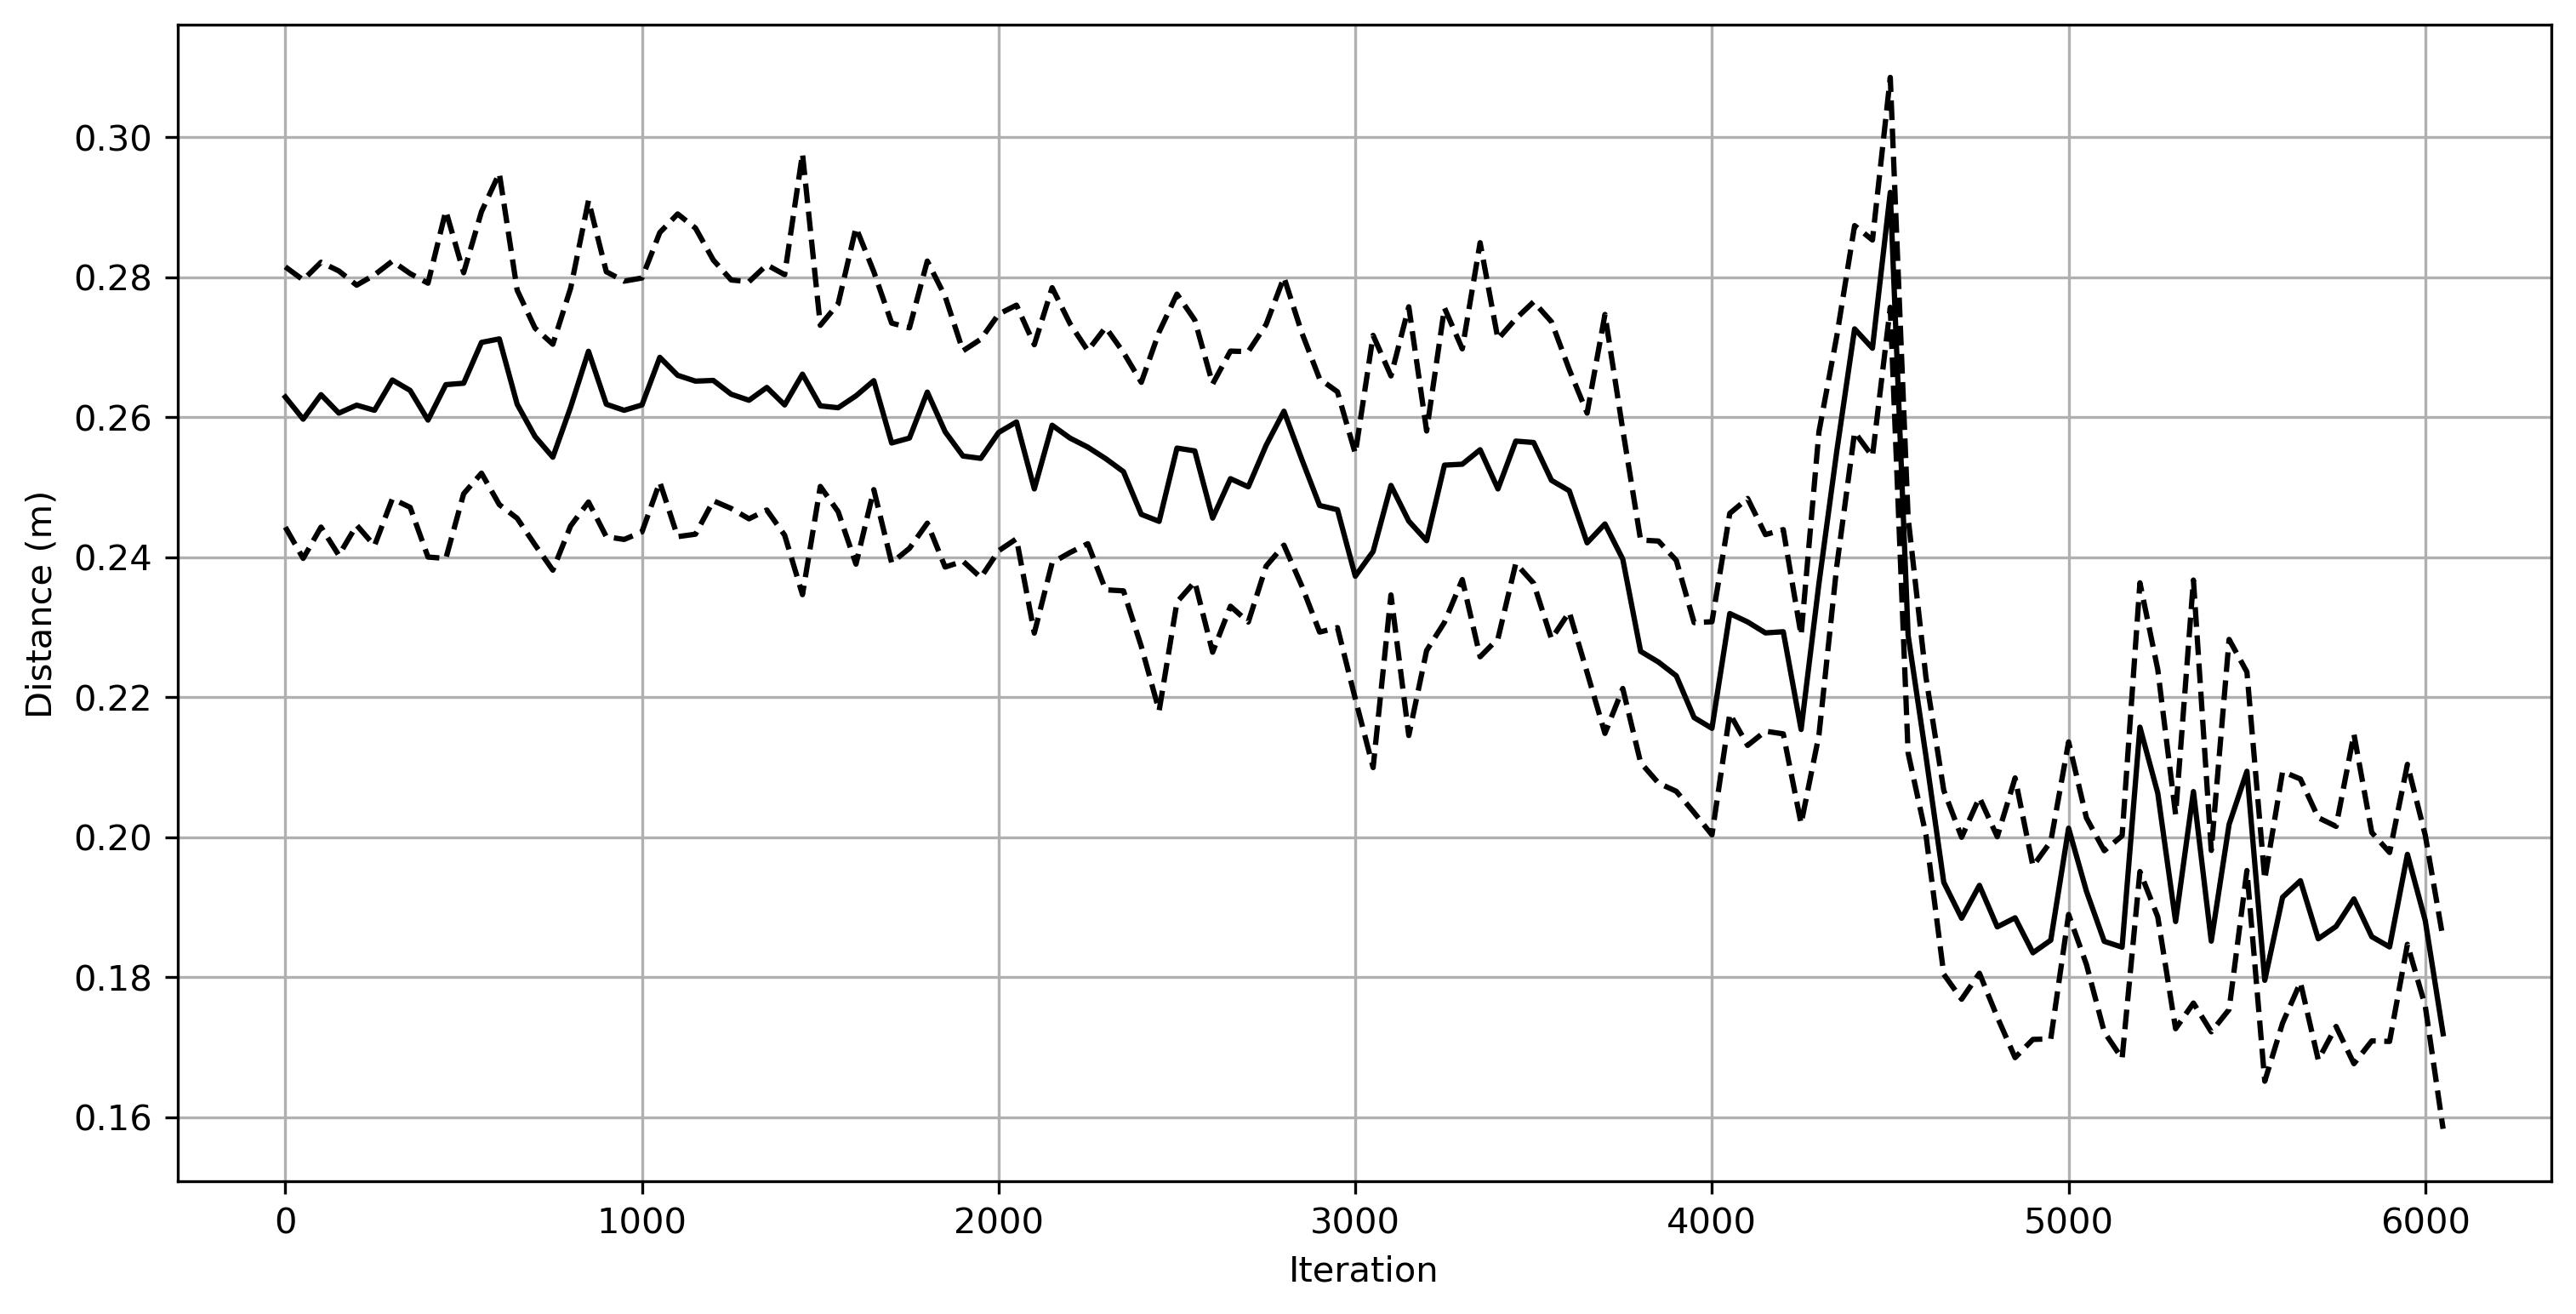

In [124]:
#Evaluation results over time
base_dir='/home/akim/vmware_shared/px4_25/'
f=plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(6)
#plt.title("Evaluation of DRL-updated PID controller")
plt.xlabel("Iteration")
plt.ylabel("Distance (m)")

i=0
step=50
mean=[]
max=[]
std=[]
t=[]
file_to_proicess=True
while file_to_proicess:
    file_name=base_dir + ('px4_rl_output1200_%d.txt' % i)
    if os.path.isfile(file_name):
        data_=np.genfromtxt(file_name, delimiter='\t')
        data_=data_[1:31,:] #remove first sample, as it can be noise as stationary position has not be achieved
        mean.append(data_[:,0].mean())
        std.append(data_[:,0].std())
        max.append(data_[:,1].max())
        t.append(i)
        i += step
        if i>6050:
            file_to_proicess=False
    else:
        file_to_proicess=False

if len(t)>0:
    plt.plot(t,mean,'k-')
    plt.plot(t,np.array(mean) + np.array(std), 'k--')
    plt.plot(t,np.array(mean) - np.array(std), 'k--')
    plt.grid()
    plt.show
    
    print('Initial: %.4f' % mean[0])
    print('Final  : %.4f, %.4f at %d' % (mean[-1], std[-1], t[-1]))
    print('Minimum: %.4f, %.4f at %d' % (mean[mean.index(min(mean))], std[mean.index(min(mean))], t[mean.index(min(mean))] ) )


Text(0.5, 0, 'Time (sec)')

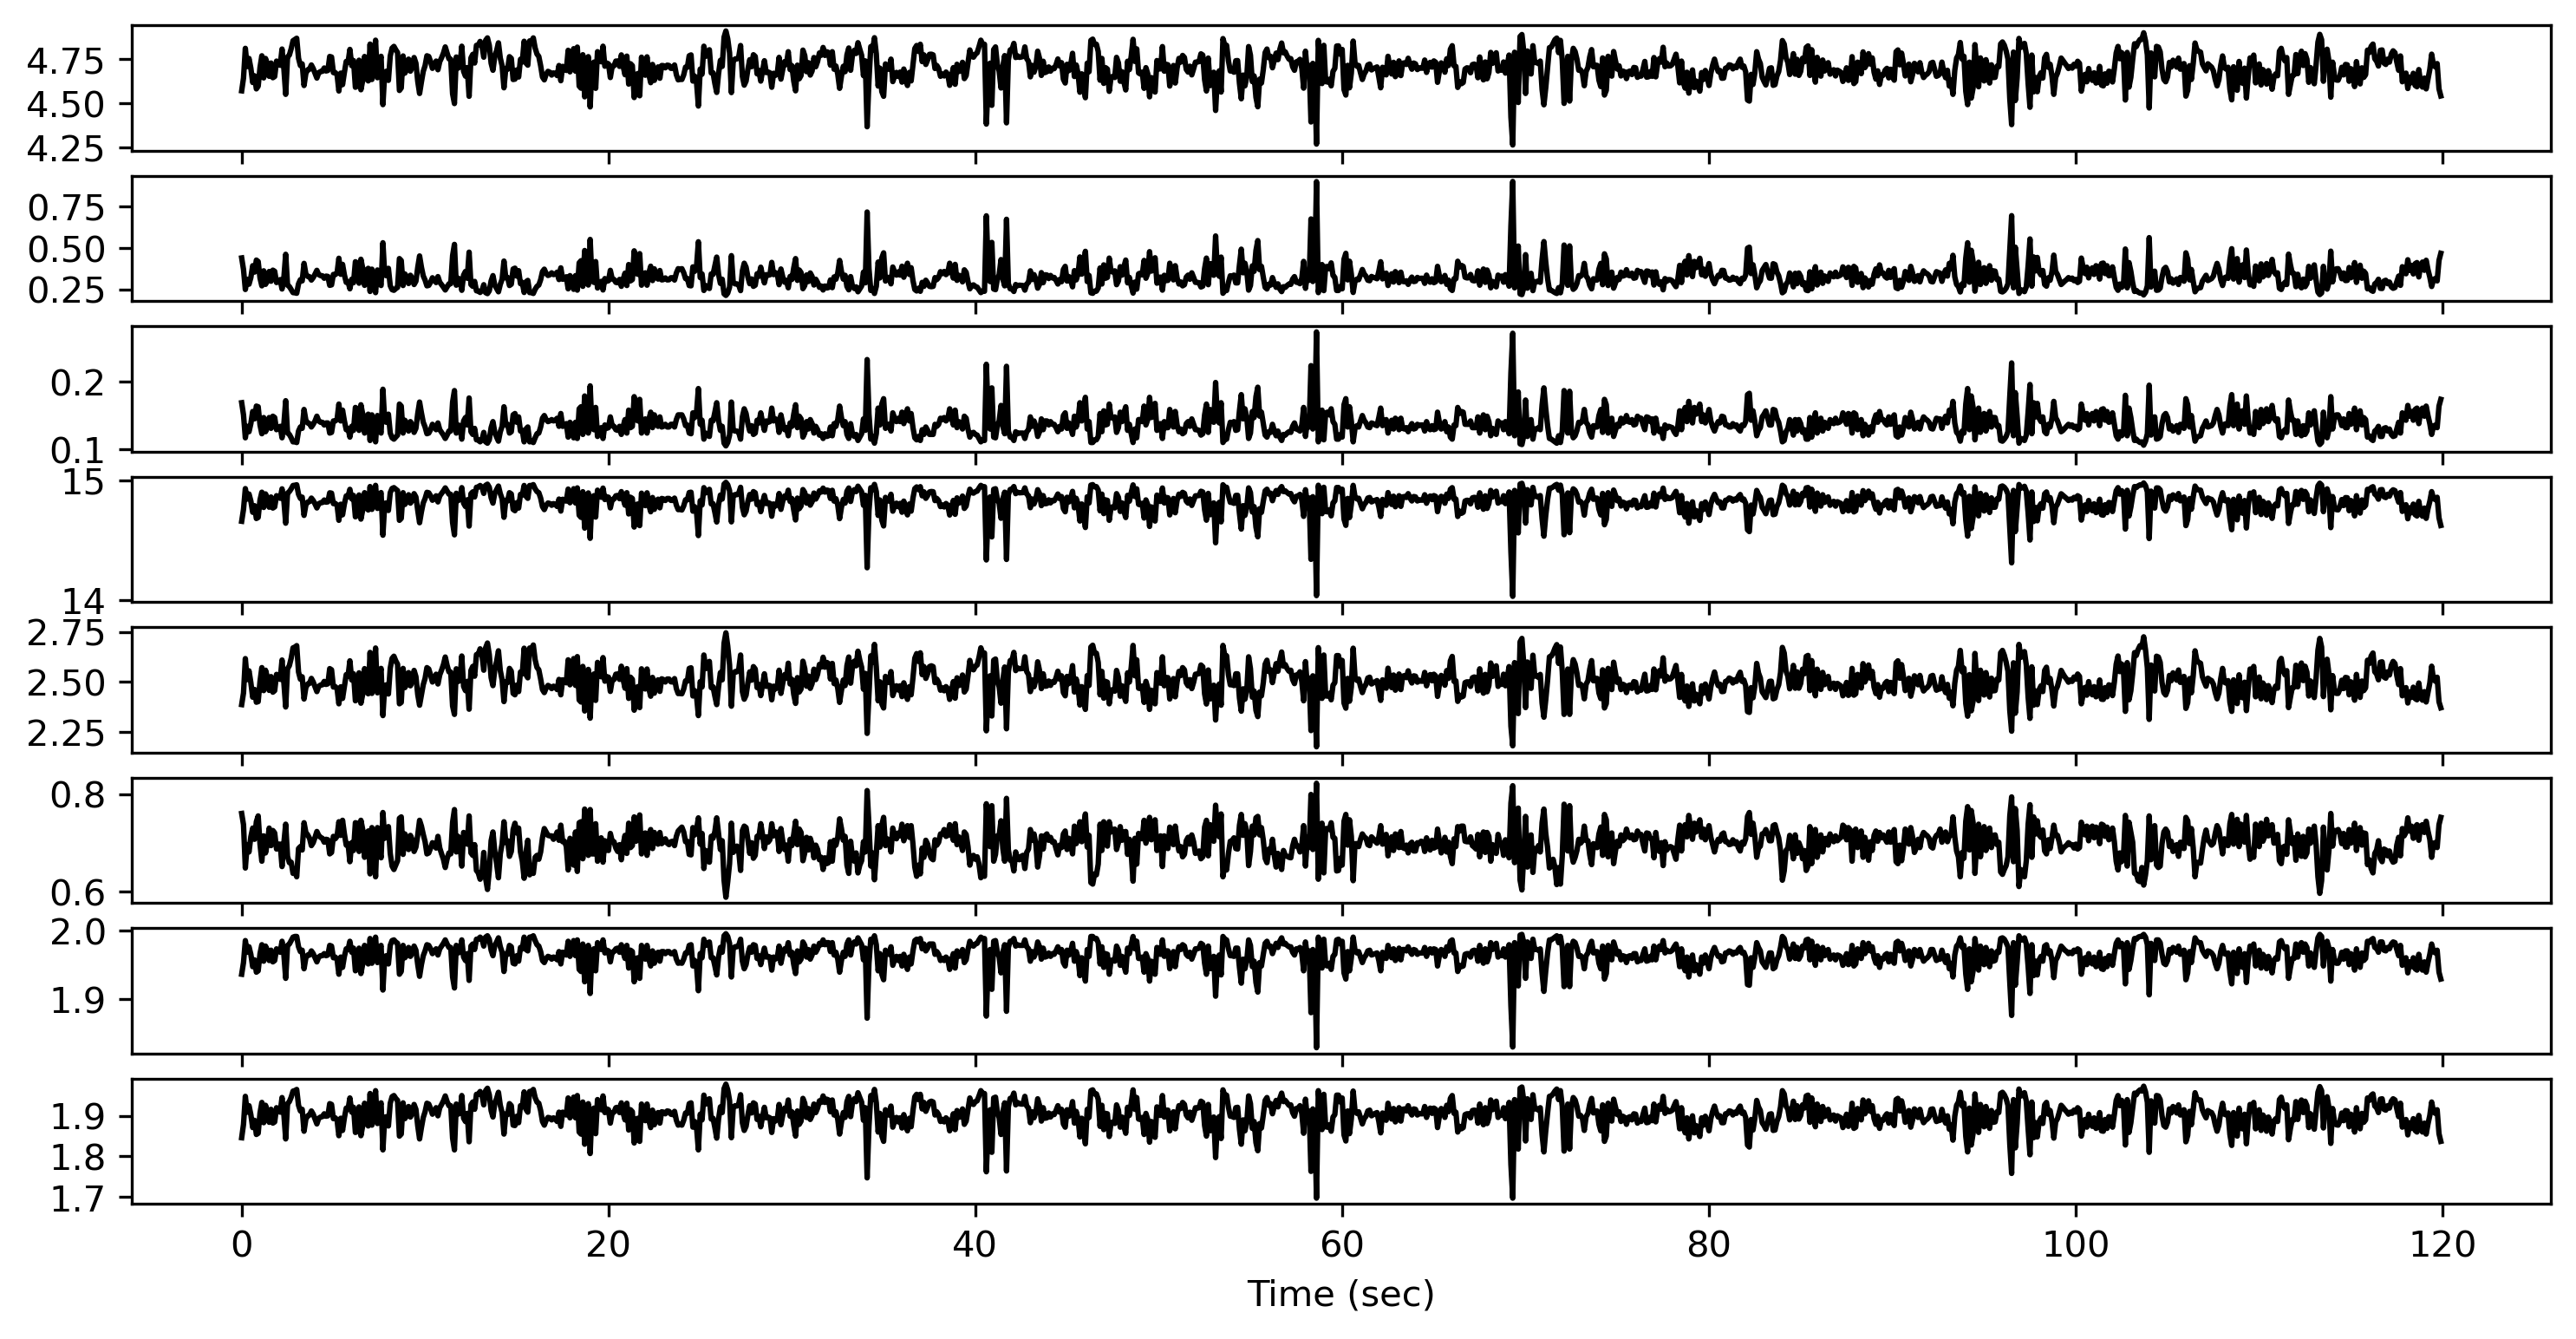

In [91]:
#Evaluation results over time
base_dir='/home/akim/vmware_shared/px4_25/'
f=plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(6)

i=6050

file_name=base_dir + ('px4_rl_action1200_%d.txt' % i)
data_=np.genfromtxt(file_name, delimiter='\t')

data_=data_[1:data_.shape[0],0:data_.shape[1]-1] 
#print(data_)
#print(data_.shape)

time_tick=np.linspace(0, 120, 1200, endpoint=False)
#print(time_tick)
for idx in range(data_.shape[1]):
    plt.subplot(8, 1, idx+1)
    plt.plot(time_tick, data_[:,idx],'k-')
    #if idx==0:
        #plt.title("XY and Z position and velocity PID controller coefficients during the last evaluation episode at iteration 6050")
    if idx < data_.shape[1]-1:
        plt.xticks(color='w')

plt.xlabel("Time (sec)")

(1201, 51)
(1200, 50)


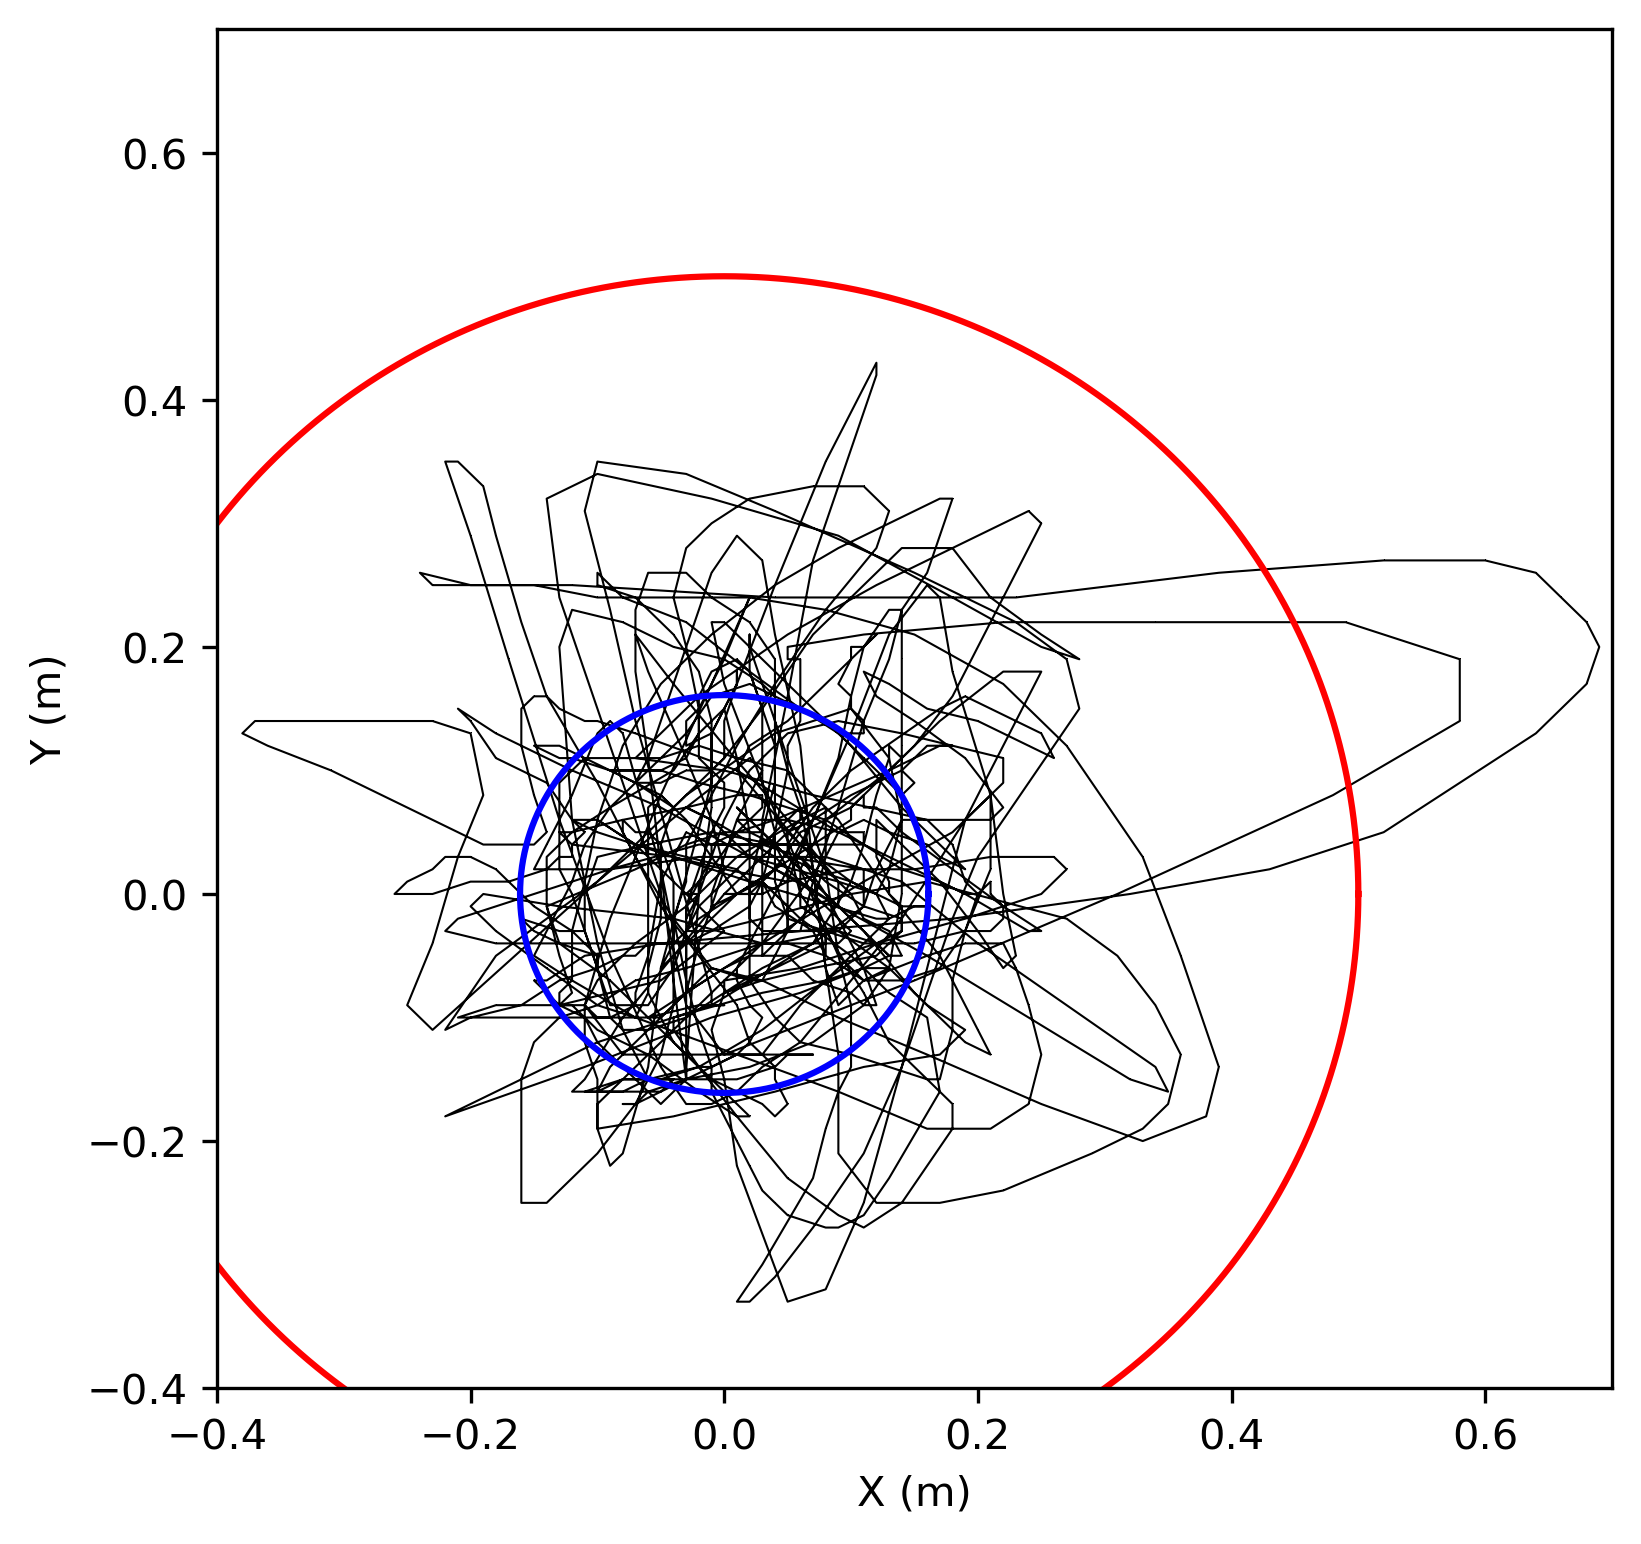

In [130]:
base_dir='/home/akim/vmware_shared/px4_25/'
f=plt.figure(dpi=300)
f.set_figwidth(6)
f.set_figheight(6)
i=6050

file_name=base_dir + ('px4_rl_observation1200_%d.txt' % i)
tdata_=np.genfromtxt(file_name, delimiter='\t')
print(tdata_.shape)
#print(data_)
tdata_=tdata_[1:tdata_.shape[0],0:tdata_.shape[1]-1] 
print(tdata_.shape)

time_tick=np.linspace(0, 120, 1200, endpoint=False)

plt.plot(tdata_[:,19]*10, tdata_[:,20]*10,'k,')
plt.plot(tdata_[:,19]*10, tdata_[:,20]*10,'k-', linewidth=0.5)
#plt.title("RWUAV's X, Y, and Z position and distance from target during the last evaluation episode at iteration 6050")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.axis([-0.4, 0.7, -0.4, 0.7])

r=0.161
s=0.00984
angle=np.linspace(0, 2*np.pi, 361, endpoint=True)
x_cir=np.cos(angle)
y_cir=np.sin(angle)
plt.plot(r*x_cir, r*y_cir,'b-')
plt.plot(0.5*x_cir, 0.5*y_cir,'r-')
#plt.plot((r+s)*x_cir, (r+s)*y_cir,'r--')
#plt.plot((r-s)*x_cir, (r-s)*y_cir,'r--')
#plt.grid()


(1201, 51)
(1200, 50)
0.01610451178259649
0.00984257928141184


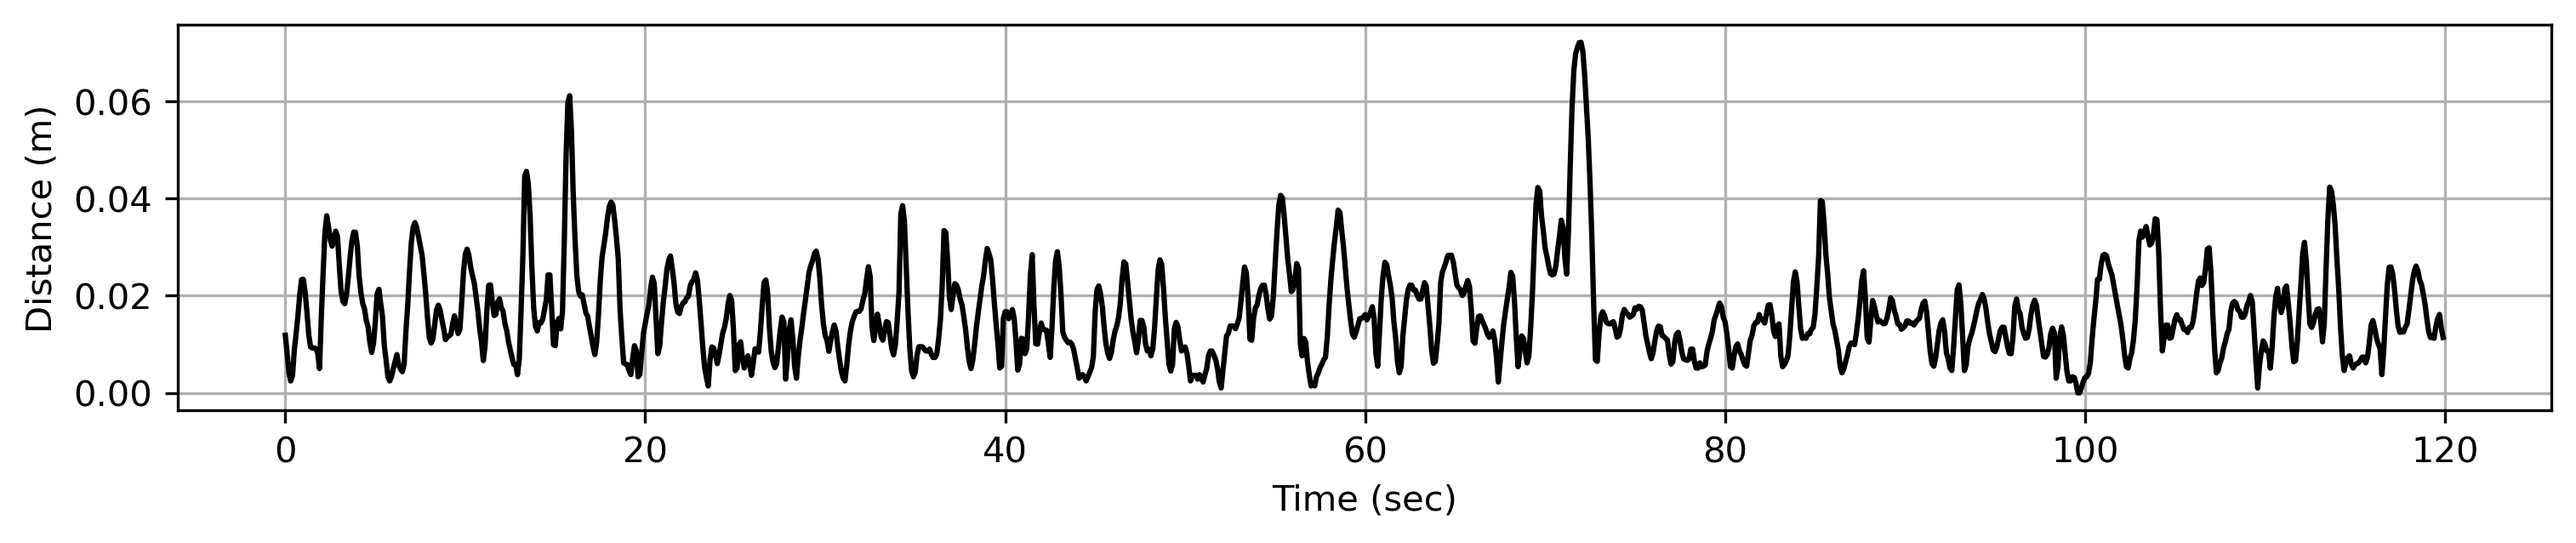

In [127]:
base_dir='/home/akim/vmware_shared/px4_25/'
f=plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(2)


i=6050

file_name=base_dir + ('px4_rl_observation1200_%d.txt' % i)
tdata_=np.genfromtxt(file_name, delimiter='\t')
print(tdata_.shape)
#print(data_)
tdata_=tdata_[1:tdata_.shape[0],0:tdata_.shape[1]-1] 
print(tdata_.shape)

time_tick=np.linspace(0, 120, 1200, endpoint=False)

dist=np.sqrt(tdata_[:,19]**2+tdata_[:,20]**2+tdata_[:,21]**2)
plt.plot(time_tick, dist,'k-')

plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
print(dist.mean())
print(dist.std())
plt.grid()

(1201, 51)
(1200, 50)
0.01610451178259649
0.00984257928141184


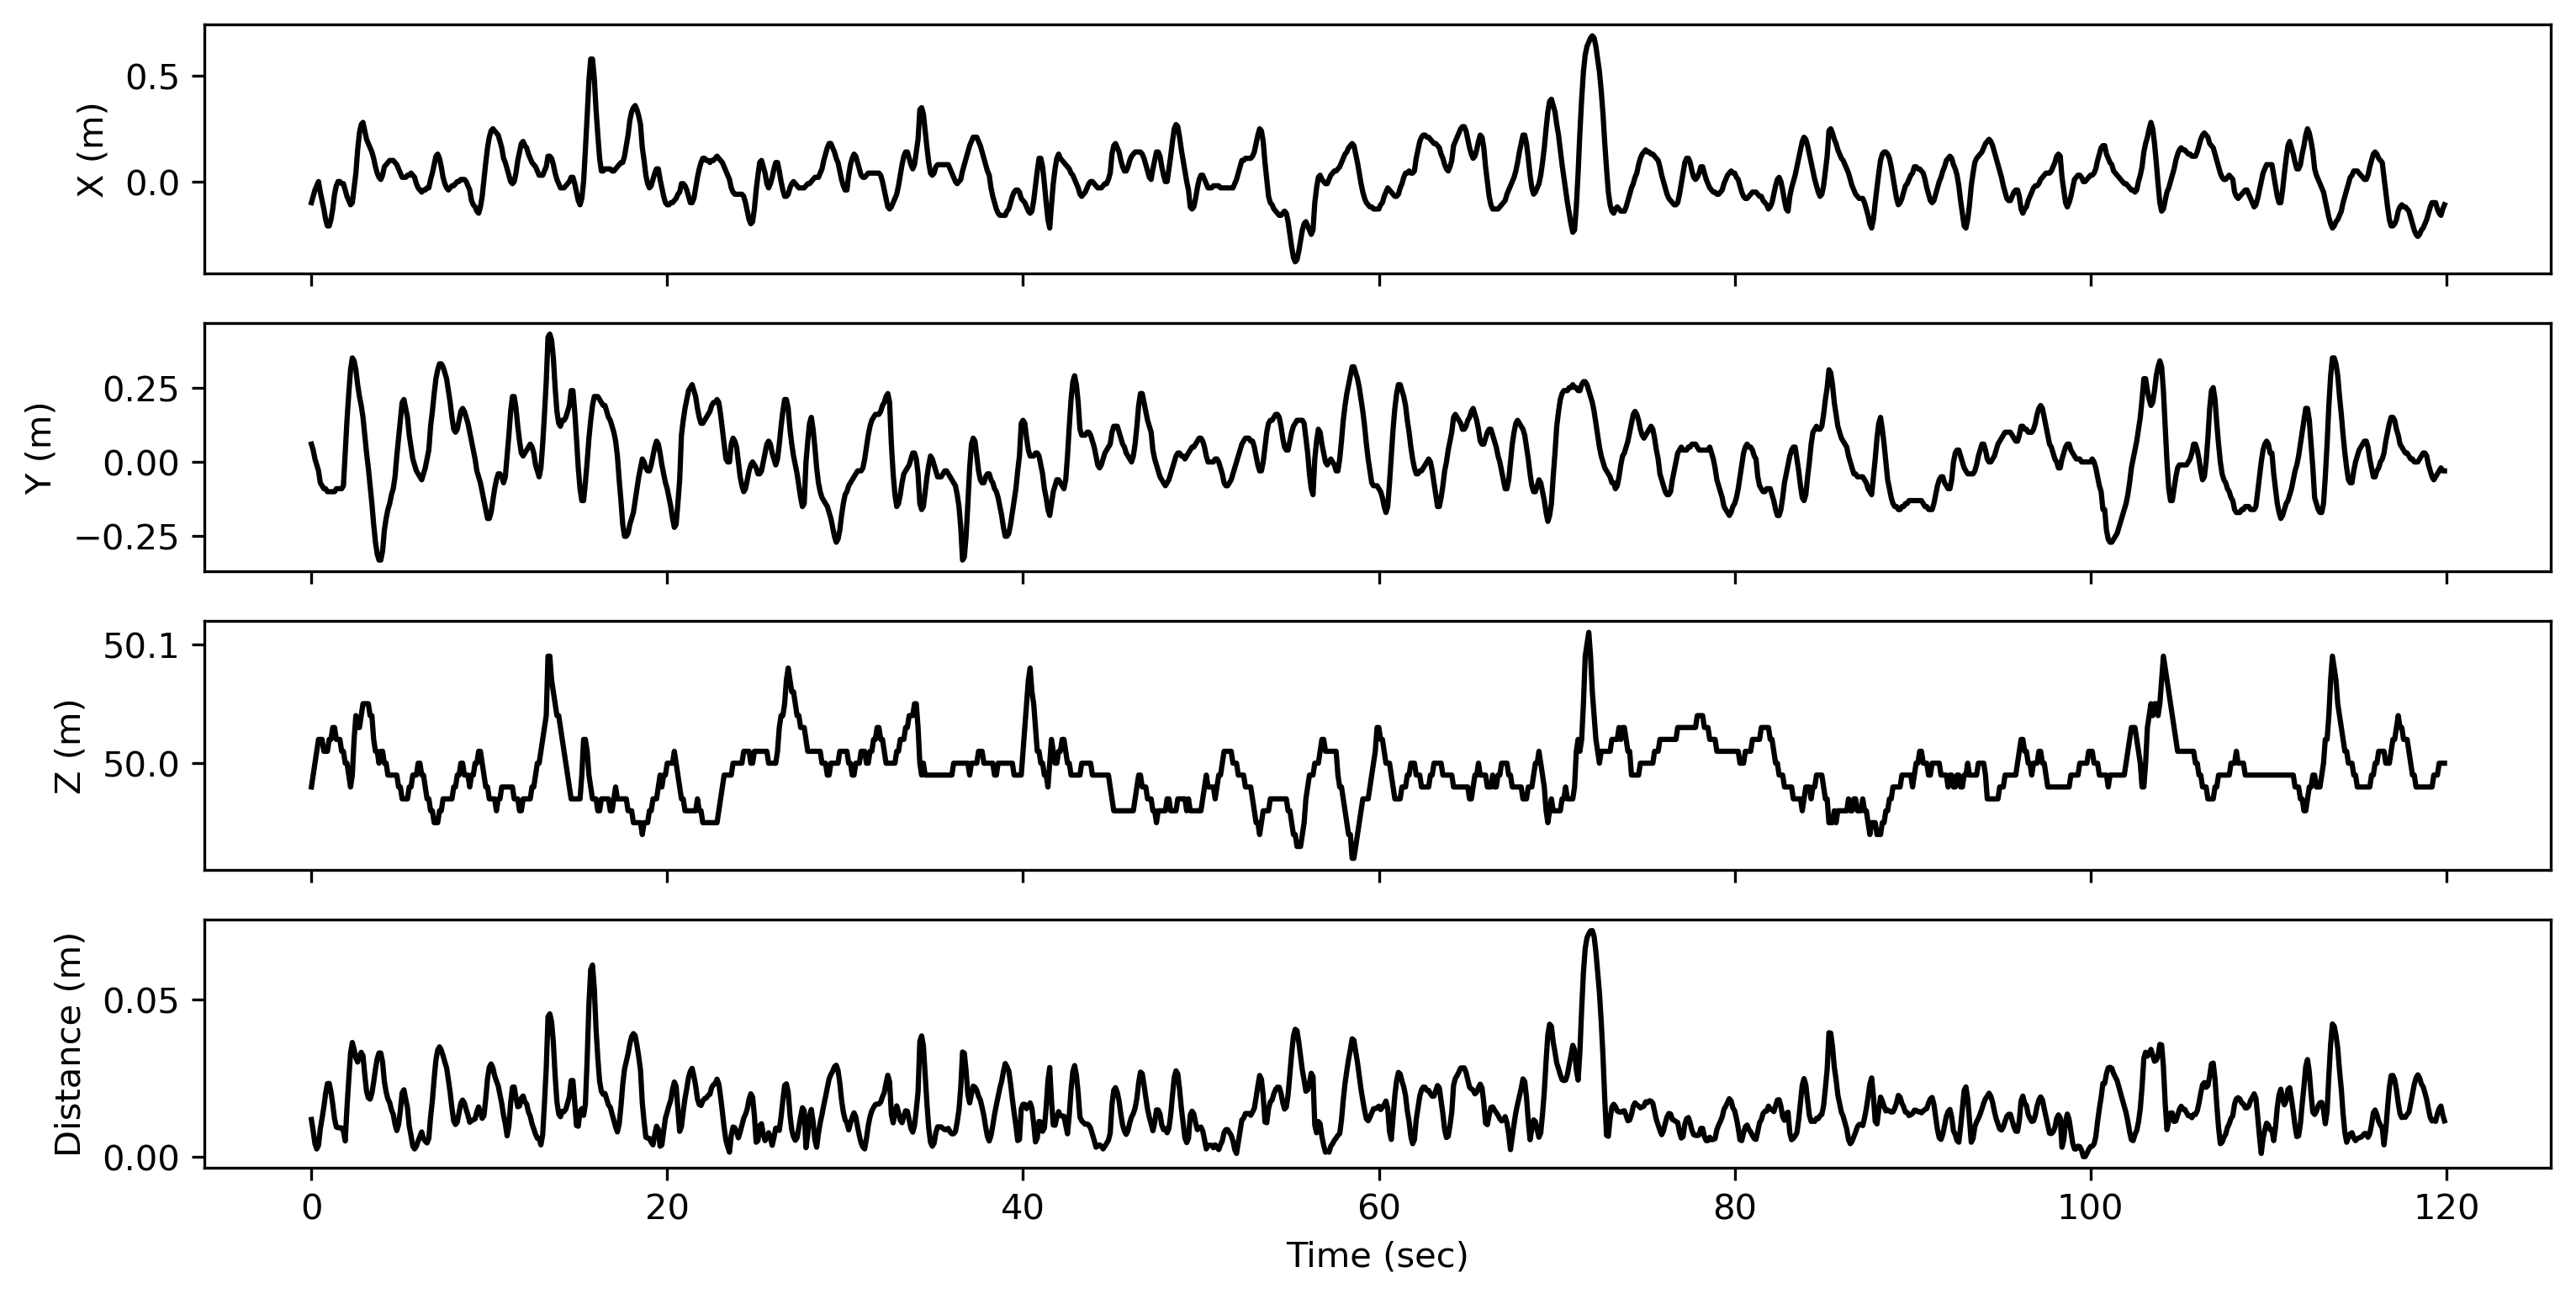

In [128]:
base_dir='/home/akim/vmware_shared/px4_25/'
f=plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(6)


i=6050

file_name=base_dir + ('px4_rl_observation1200_%d.txt' % i)
tdata_=np.genfromtxt(file_name, delimiter='\t')
print(tdata_.shape)
#print(data_)
tdata_=tdata_[1:tdata_.shape[0],0:tdata_.shape[1]-1] 
print(tdata_.shape)

time_tick=np.linspace(0, 120, 1200, endpoint=False)

plt.subplot(4, 1, 1)
plt.plot(time_tick, tdata_[:,19]*10,'k-')
#plt.title("RWUAV's X, Y, and Z position and distance from target during the last evaluation episode at iteration 6050")
plt.ylabel("X (m)")
plt.xticks(color='w')

plt.subplot(4, 1, 2)
plt.plot(time_tick, tdata_[:,20]*10,'k-')
plt.ylabel("Y (m)")
plt.xticks(color='w')

plt.subplot(4, 1, 3)
plt.plot(time_tick, tdata_[:,21]*10+50,'k-')
plt.ylabel("Z (m)")
plt.xticks(color='w')

plt.subplot(4, 1, 4)
dist=np.sqrt(tdata_[:,19]**2+tdata_[:,20]**2+tdata_[:,21]**2)
plt.plot(time_tick, dist,'k-')

plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
print(dist.mean())
print(dist.std())